In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Setup & Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ExcelR/P578/telecommunications_Dataset.csv")
print("Shape of dataset:", df.shape)

# Preview first few rows
df.head()


Shape of dataset: (3333, 19)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [4]:
# Info about columns and data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [5]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64


In [6]:
df.nunique()

,0
account_length,212
voice_mail_plan,2
voice_mail_messages,46
day_mins,1667
evening_mins,1611
night_mins,1591
international_mins,162
customer_service_calls,10
international_plan,2
day_calls,119


In [7]:
# Basic statistics (numerical features)
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [8]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Numerical columns: ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge', 'churn']


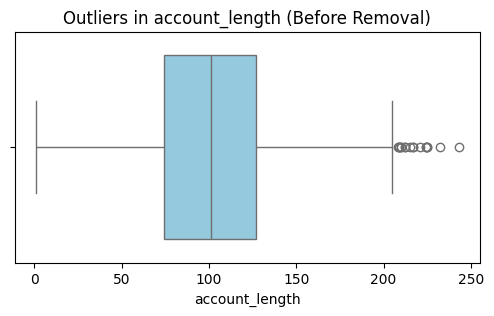

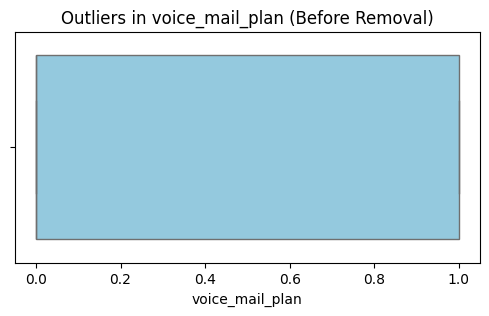

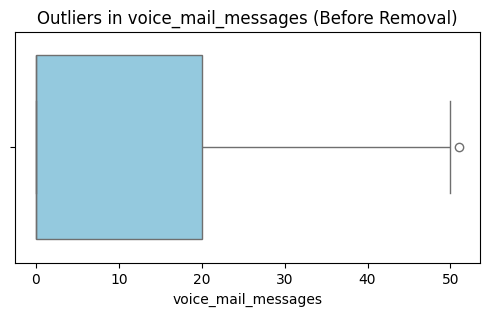

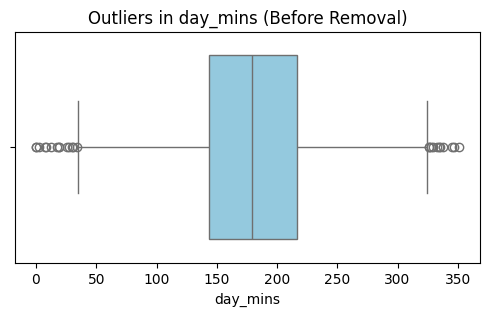

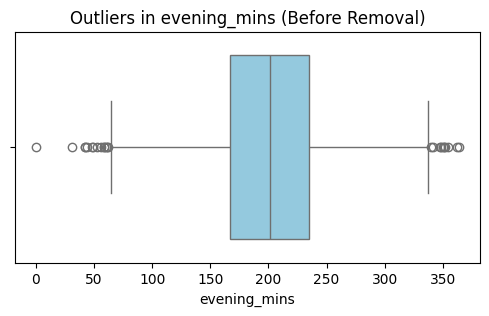

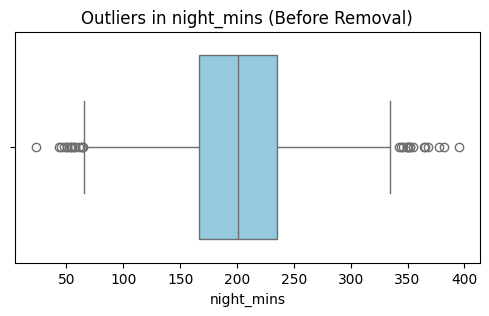

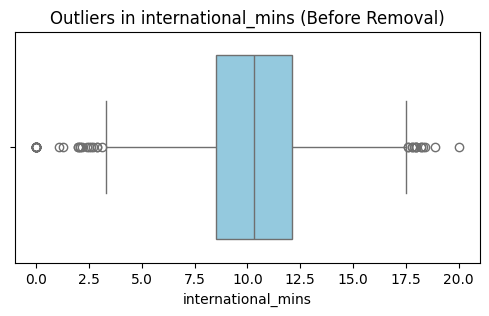

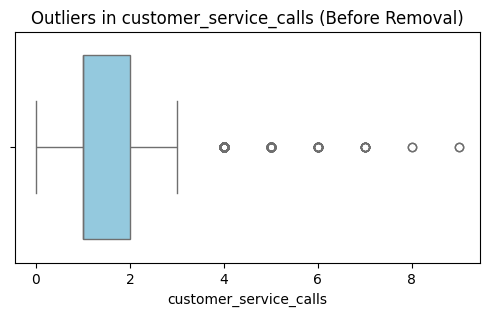

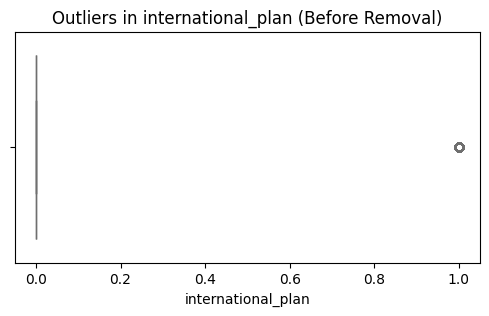

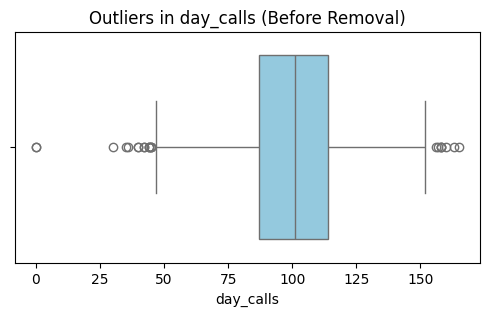

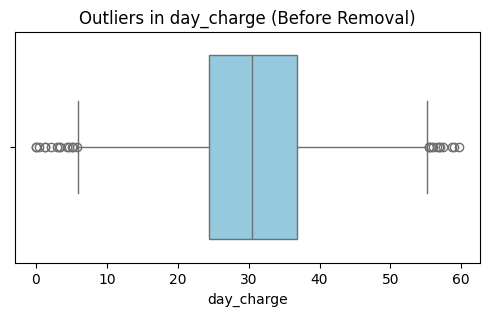

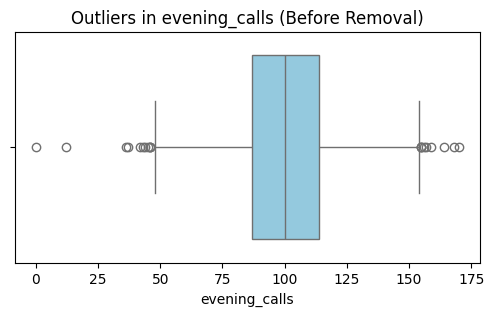

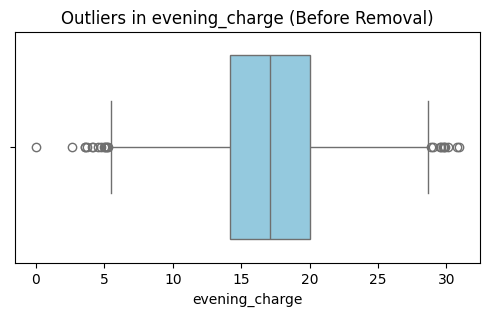

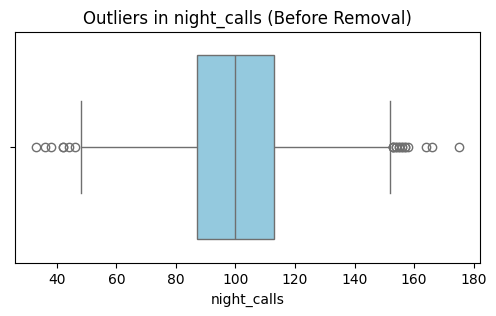

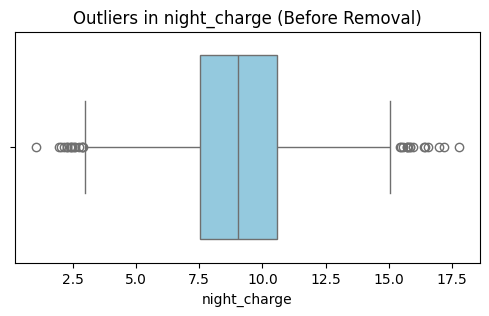

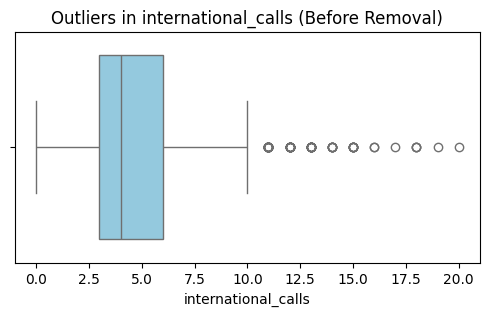

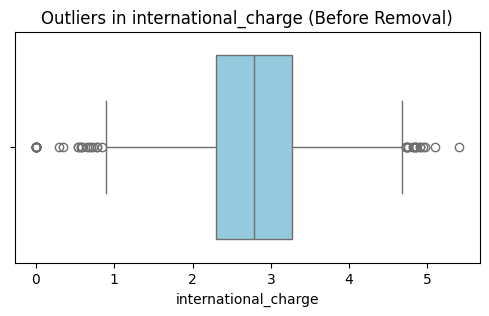

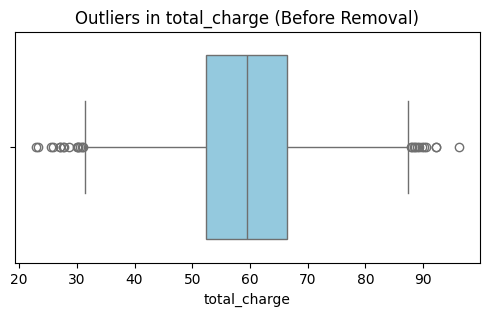

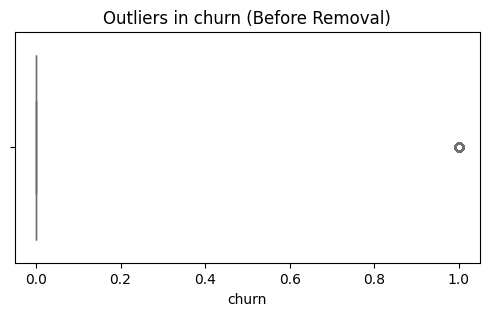

In [9]:
# Outlier Detection

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Numerical columns:", numerical_cols)

# Visualize outliers before removal
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Outliers in {col} (Before Removal)")
    plt.show()

In [10]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# --- THIS IS THE FIX ---
# Remove the target variable 'churn' from the list of columns to clean
if 'churn' in numerical_cols:
    numerical_cols.remove('churn')
# --------------------

# Function to remove outliers using IQR (no changes to the function itself)
def remove_outliers_iqr(data, cols):
    df_clean = data.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply outlier removal to the FEATURES ONLY
df_clean = remove_outliers_iqr(df, numerical_cols)

print("Original dataset shape:", df.shape)
print("Shape after outlier removal:", df_clean.shape)

# IMPORTANT: Check the churn distribution now. You should see both classes.
print("\nChurn distribution after cleaning:")
print(df_clean['churn'].value_counts())

Original dataset shape: (3333, 19)
Shape after outlier removal: (2507, 19)

Churn distribution after cleaning:
churn
0    2317
1     190
Name: count, dtype: int64


/tmp/ipython-input-2098538922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette="Set2")


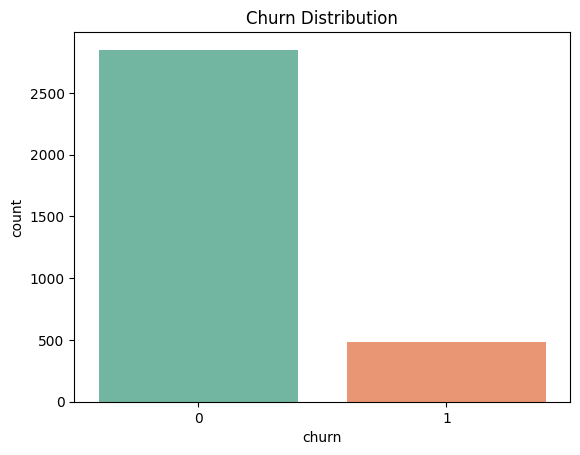

In [11]:
#Target Variable Distribution
# Countplot
sns.countplot(x='churn', data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

# Pie chart
fig = px.pie(df, names='churn', title="Churn Proportion")
fig.show()

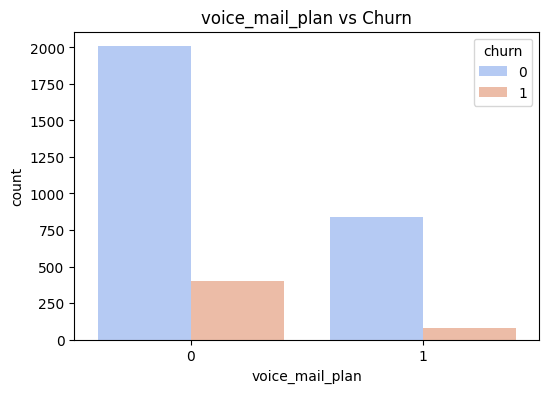

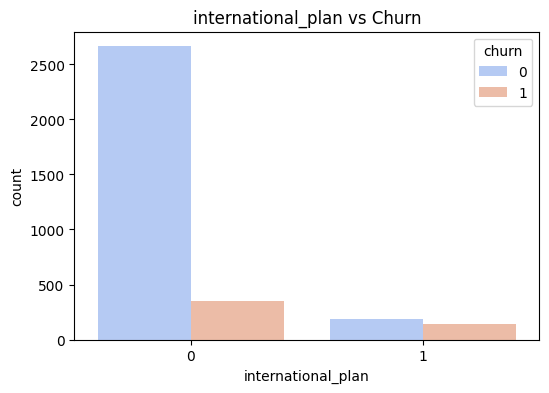

In [12]:
#Binary Categorical Features VS Churn
binary_cols = ['voice_mail_plan', 'international_plan']

for col in binary_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='churn', data=df, palette="coolwarm")
    plt.title(f"{col} vs Churn")
    plt.show()


/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




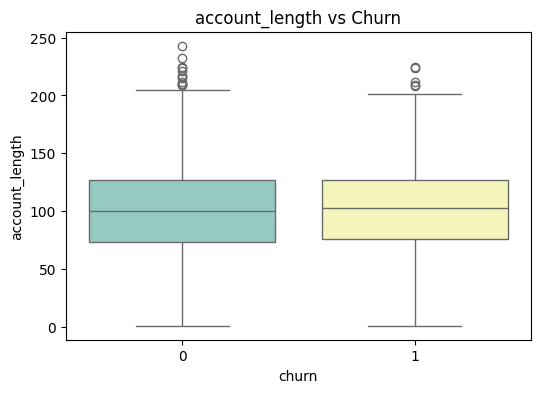

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




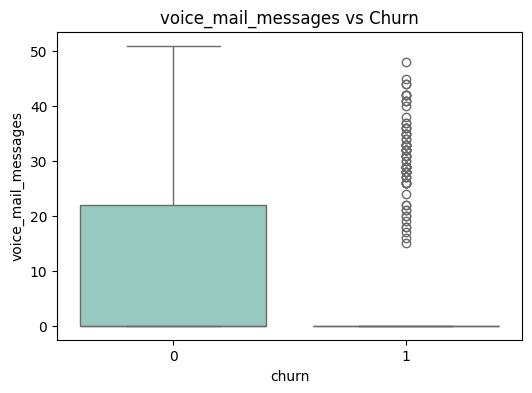

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




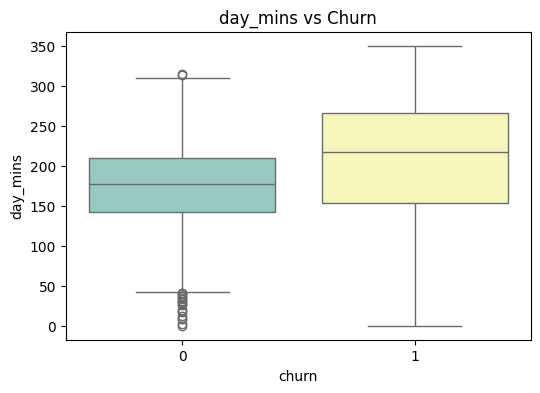

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




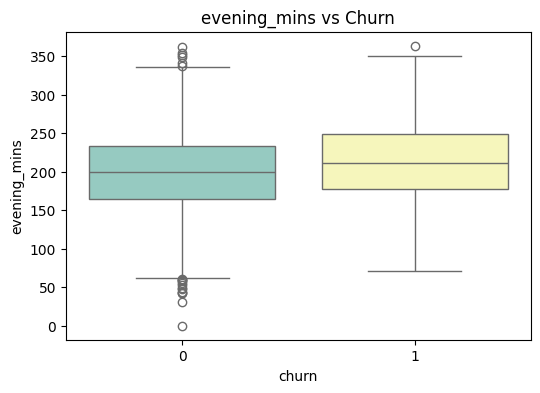

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




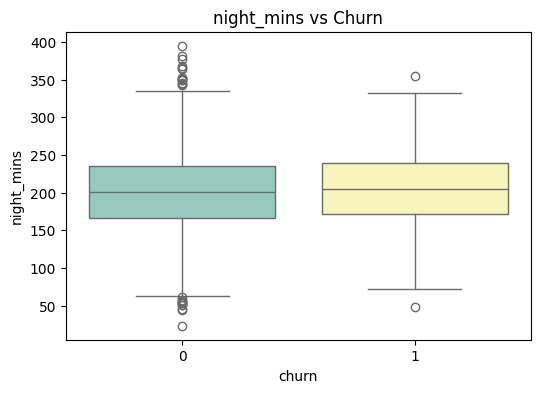

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




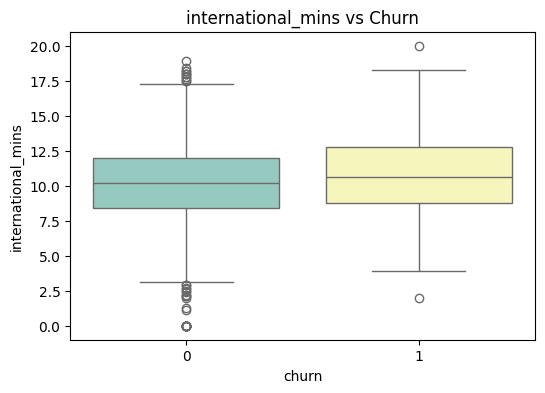

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




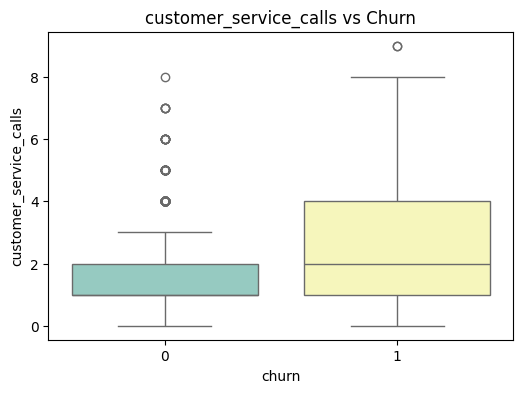

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




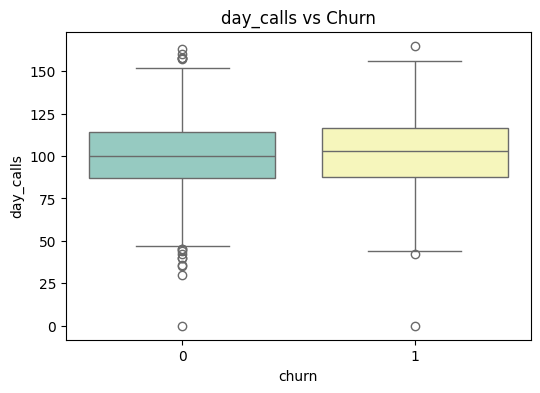

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




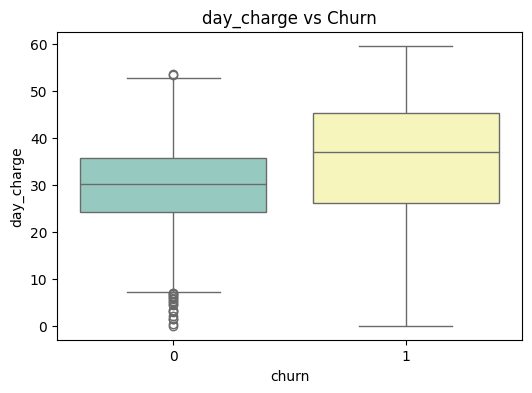

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




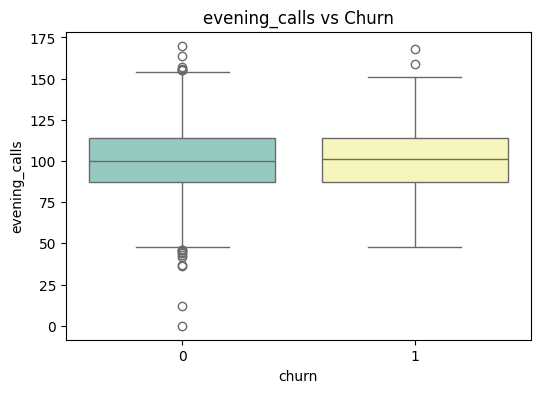

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




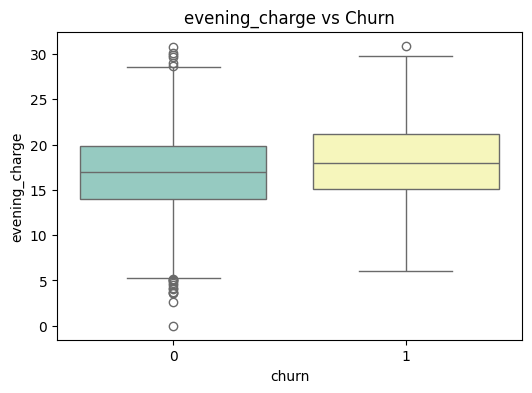

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




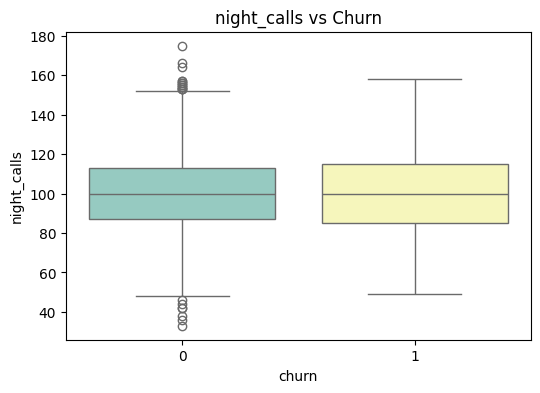

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




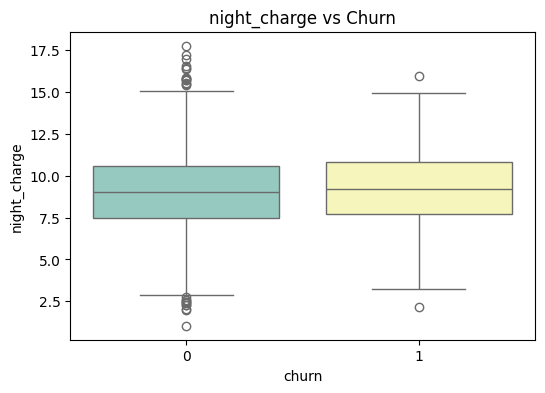

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




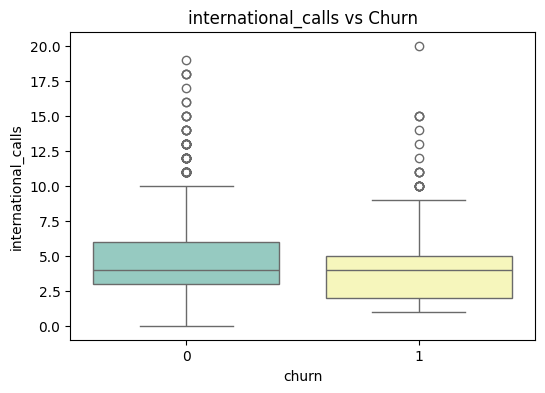

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




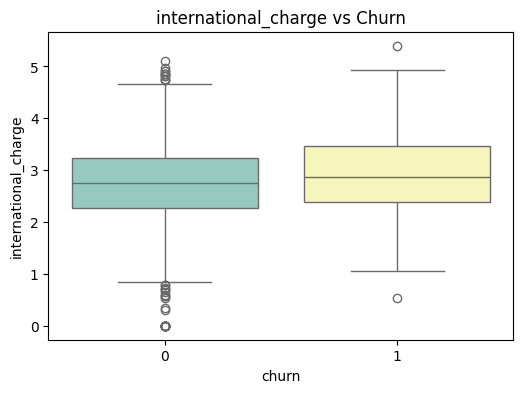

/tmp/ipython-input-964694658.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




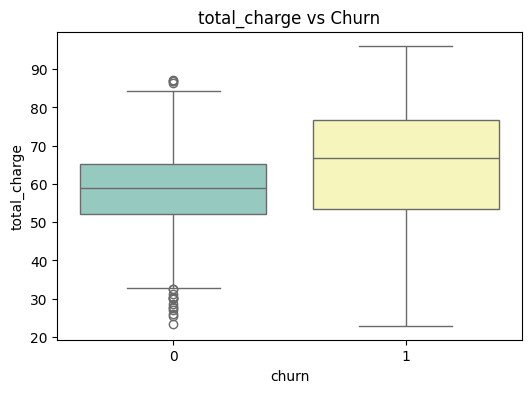

In [13]:
numerical_cols = ['account_length','voice_mail_messages','day_mins','evening_mins','night_mins',
                  'international_mins','customer_service_calls','day_calls','day_charge',
                  'evening_calls','evening_charge','night_calls','night_charge',
                  'international_calls','international_charge','total_charge']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=col, data=df, palette="Set3")
    plt.title(f"{col} vs Churn")
    plt.show()

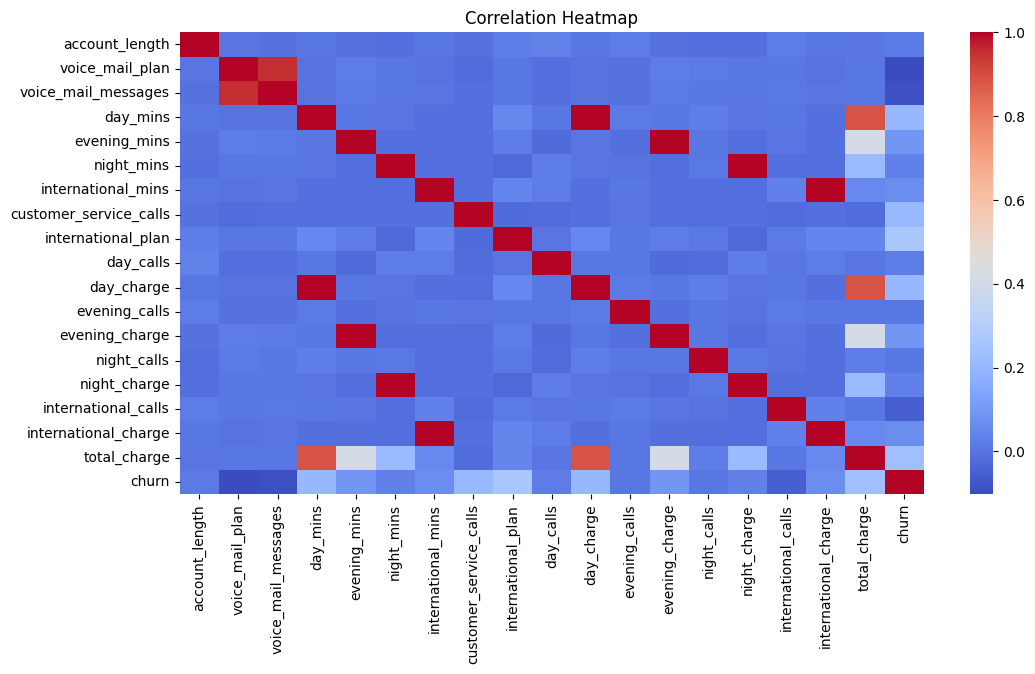

Correlation with churn:
 churn                     1.000000
international_plan        0.259852
total_charge              0.231549
customer_service_calls    0.208750
day_mins                  0.205151
day_charge                0.205151
evening_mins              0.092796
evening_charge            0.092786
international_charge      0.068259
international_mins        0.068239
night_charge              0.035496
night_mins                0.035493
day_calls                 0.018459
account_length            0.016541
evening_calls             0.009233
night_calls               0.006141
international_calls      -0.052844
voice_mail_messages      -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64


In [14]:
#Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Correlation with churn only
churn_corr = df.corr()['churn'].sort_values(ascending=False)
print("Correlation with churn:\n", churn_corr)


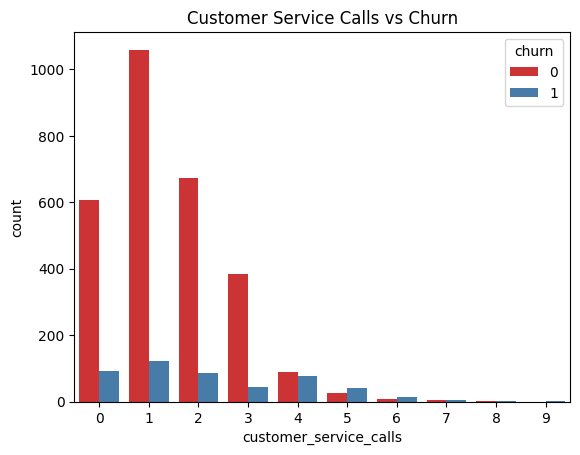

In [15]:
#Customer Service Calls VS Churn
sns.countplot(x='customer_service_calls', hue='churn', data=df, palette="Set1")
plt.title("Customer Service Calls vs Churn")
plt.show()


In [16]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [17]:
print(df.columns.tolist())


['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge', 'churn']


Categorical columns: ['voice_mail_plan', 'international_plan']


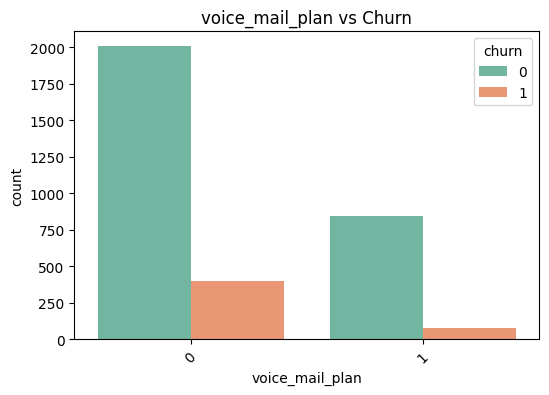

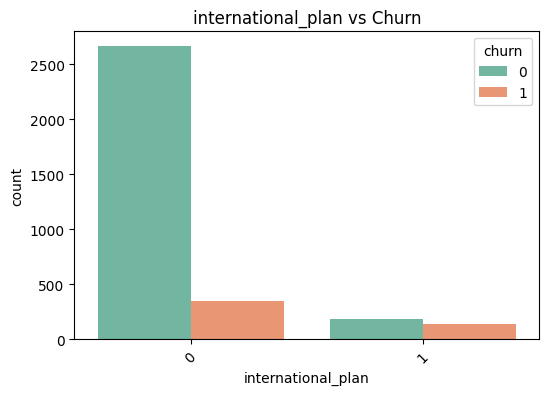

In [18]:
# Countplot for categorical features vs churn
# Detect categorical columns (object OR with few unique values)
categorical_cols = [col for col in df.columns
                    if df[col].dtype == 'object' or df[col].nunique() < 10]

# Remove target column
categorical_cols = [col for col in categorical_cols if col != 'churn']

print("Categorical columns:", categorical_cols)

# Plot churn distribution across these categorical features
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='churn', data=df, palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()




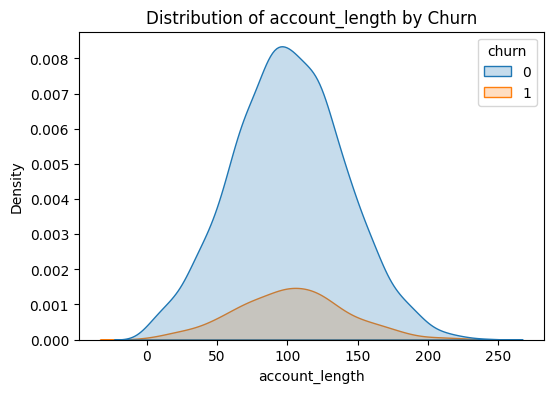

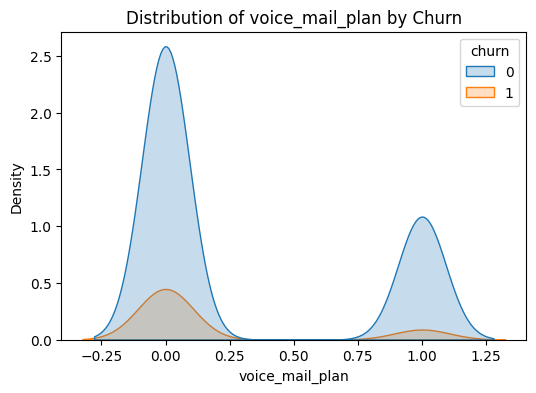

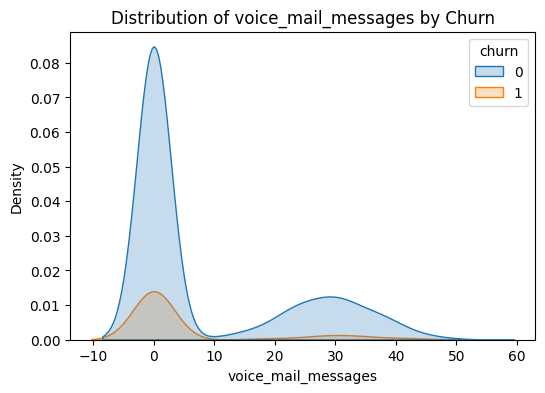

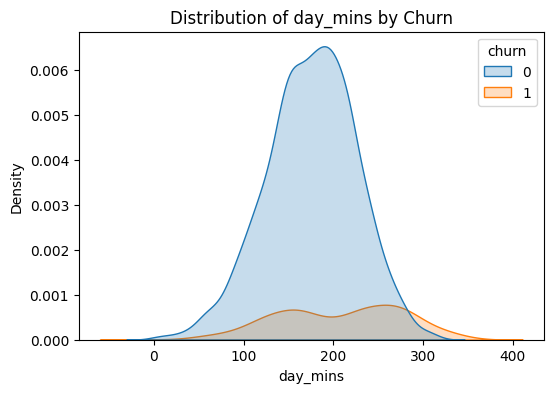

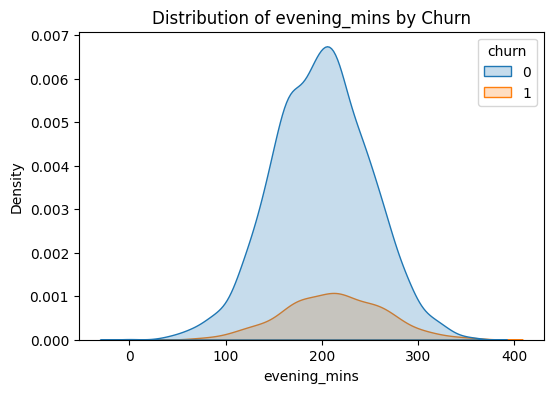

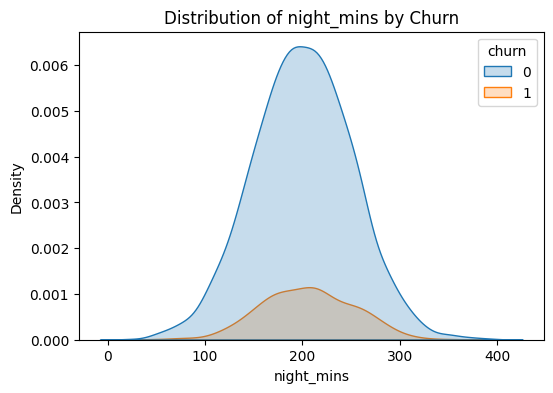

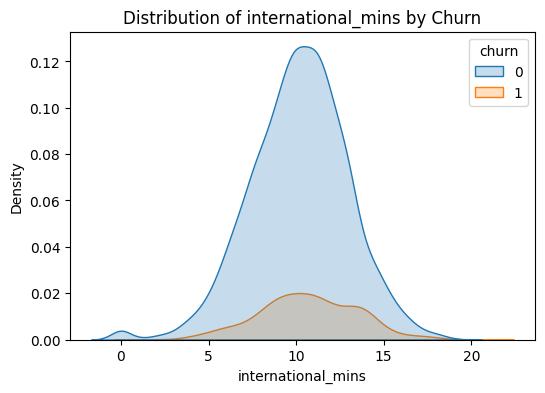

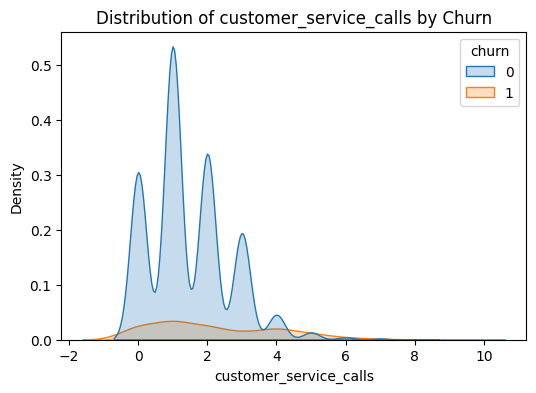

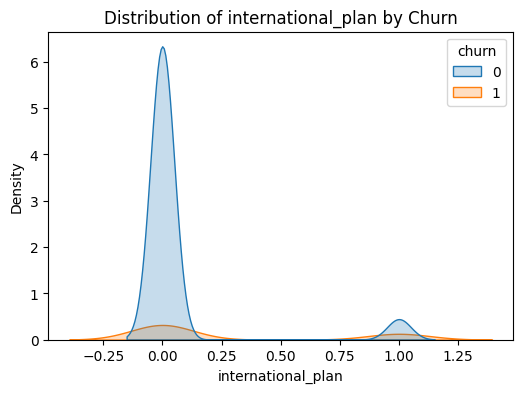

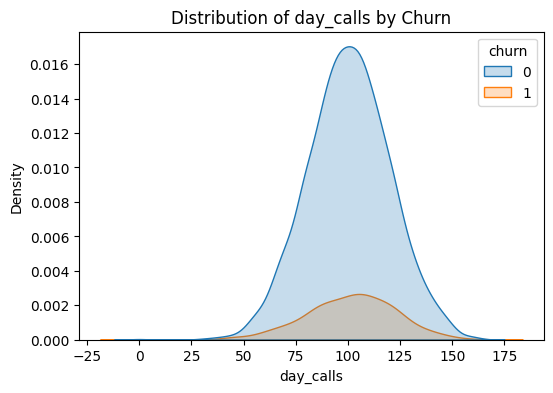

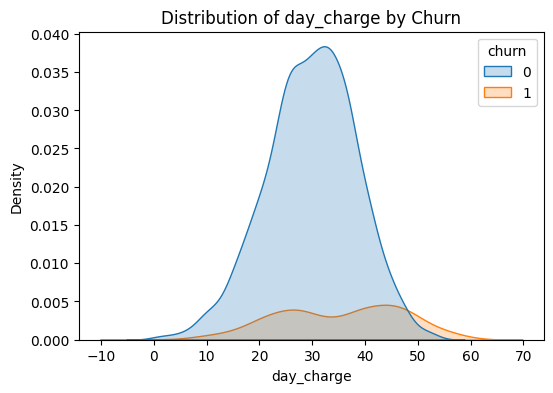

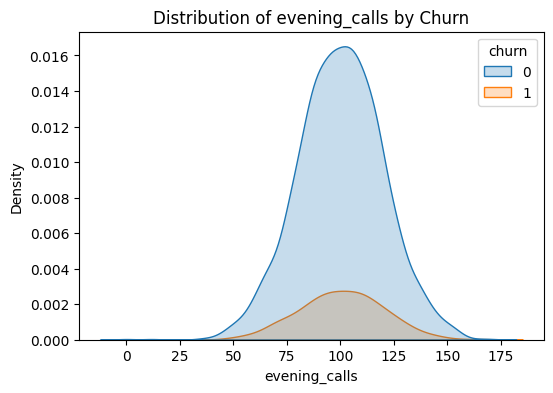

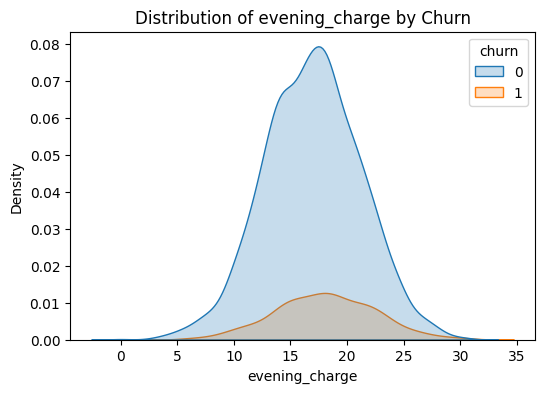

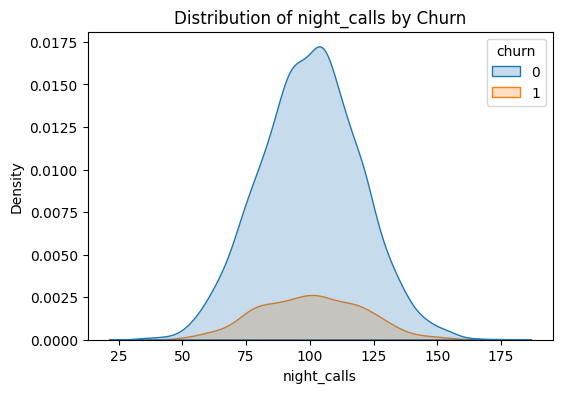

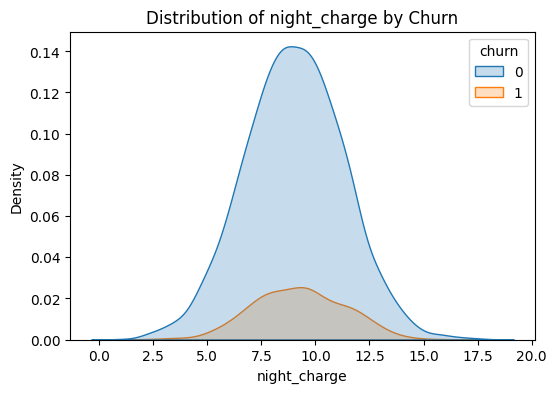

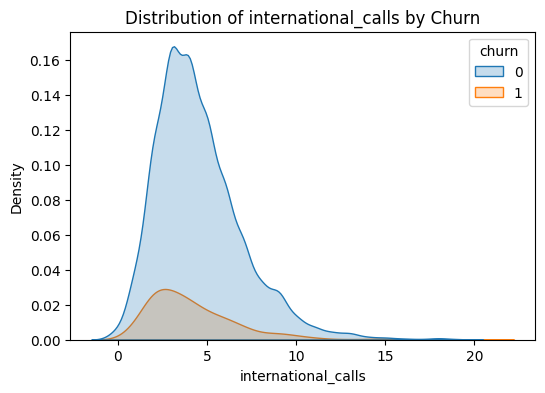

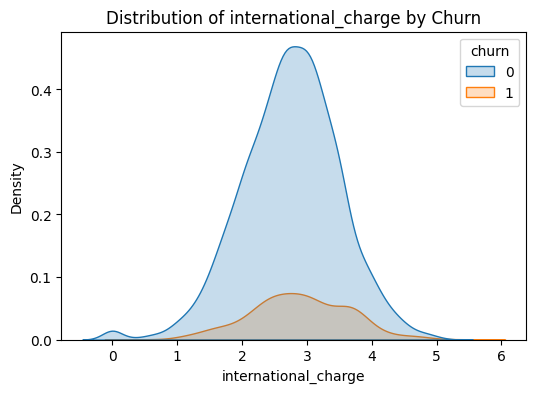

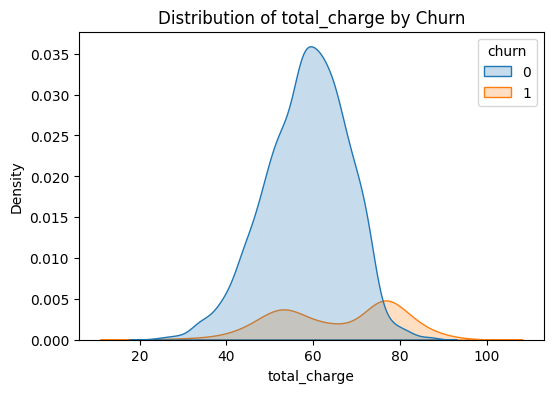

/tmp/ipython-input-2091321077.py:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



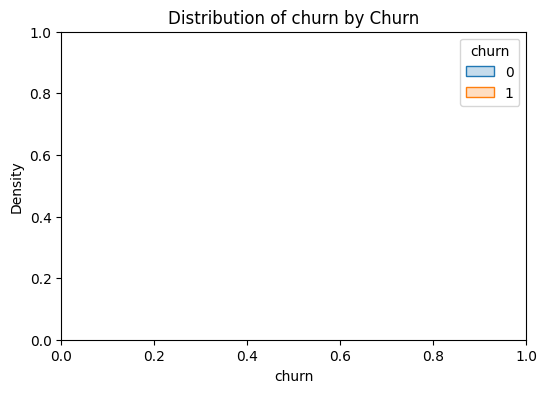

In [19]:
# Distribution of numerical features segmented by churn
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True)
    plt.title(f"Distribution of {col} by Churn")
    plt.show()


churn                            0           1
account_length          100.793684  102.664596
voice_mail_plan           0.295439    0.165631
voice_mail_messages       8.604561    5.115942
day_mins                175.175754  206.914079
evening_mins            199.043298  212.410145
night_mins              200.133193  205.231677
international_mins       10.158877   10.700000
customer_service_calls    1.449825    2.229814
international_plan        0.065263    0.283644
day_calls               100.283158  101.335404
day_charge               29.780421   35.175921
evening_calls           100.038596  100.561077
evening_charge           16.918909   18.054969
night_calls             100.058246  100.399586
night_charge              9.006074    9.235528
international_calls       4.532982    4.163561
international_charge      2.743404    2.889545
total_charge             58.448807   65.355963
churn                     0.000000    1.000000


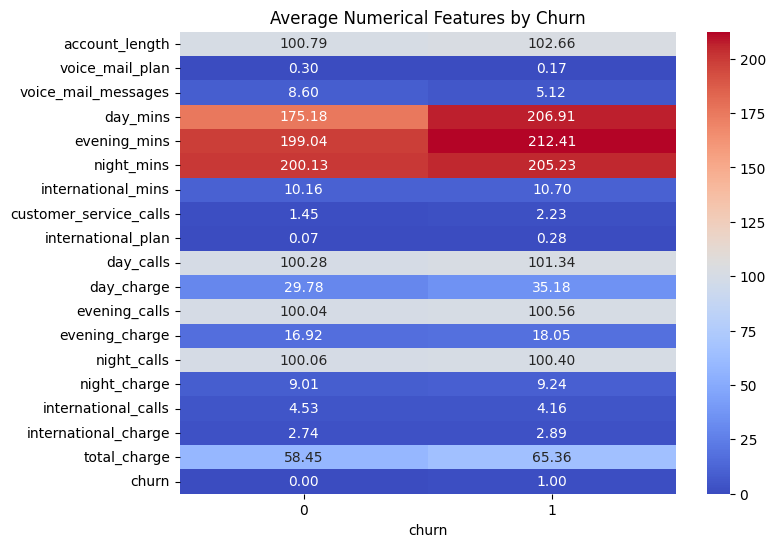

In [20]:
#Bivariate Analysis
# Grouped mean statistics
grouped = df.groupby("churn")[numerical_cols].mean().T
print(grouped)

# Heatmap for comparison
plt.figure(figsize=(8,6))
sns.heatmap(grouped, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Numerical Features by Churn")
plt.show()


churn                       0          1
international_plan                      
0                   88.504983  11.495017
1                   57.585139  42.414861


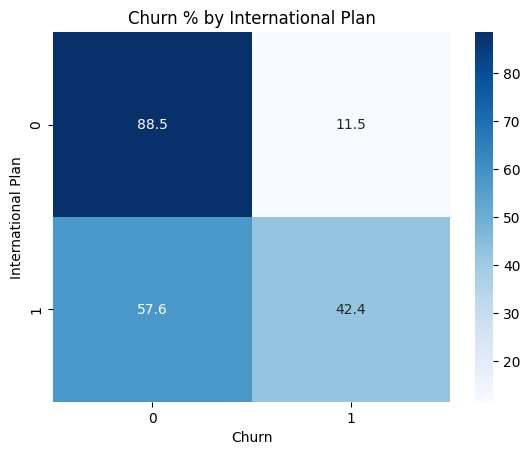

churn                    0          1
voice_mail_plan                      
0                83.284944  16.715056
1                91.323210   8.676790


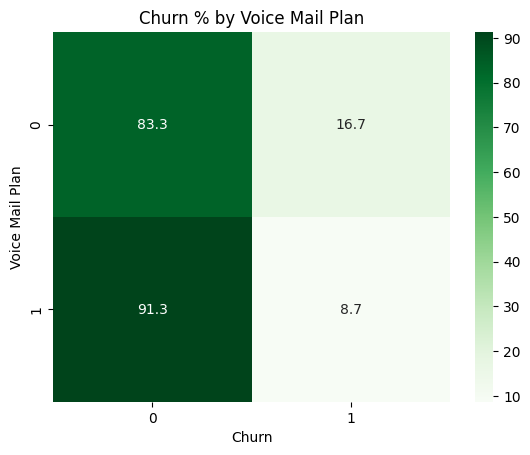

In [21]:
# Crosstab example: International Plan vs Churn
ct = pd.crosstab(df['international_plan'], df['churn'], normalize='index') * 100
print(ct)

sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Churn % by International Plan")
plt.ylabel("International Plan")
plt.xlabel("Churn")
plt.show()

# Crosstab example: Voice Mail Plan vs Churn
ct2 = pd.crosstab(df['voice_mail_plan'], df['churn'], normalize='index') * 100
print(ct2)

sns.heatmap(ct2, annot=True, fmt=".1f", cmap="Greens")
plt.title("Churn % by Voice Mail Plan")
plt.ylabel("Voice Mail Plan")
plt.xlabel("Churn")
plt.show()


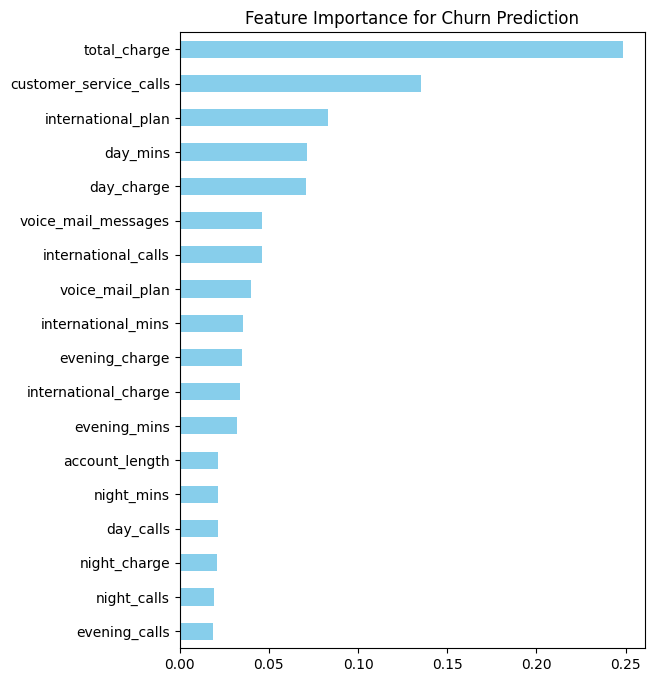

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (only objects, not churn since it's numeric already)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# Encode categorical features
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define X and y
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']  # already 0/1 numeric

# Train RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(6,8))
importances.plot(kind='barh', color="skyblue")
plt.title("Feature Importance for Churn Prediction")
plt.show()


In [23]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate features (exclude target variable)
X = df.drop('churn', axis=1)

# Optional: if categorical variables exist, encode them first
# X = pd.get_dummies(X, drop_first=True)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                   Feature           VIF
0           account_length  7.197958e+00
1          voice_mail_plan  1.645595e+01
2      voice_mail_messages  1.607146e+01
3                 day_mins  1.246201e+08
4             evening_mins  3.738593e+07
5               night_mins  1.071873e+07
6       international_mins  9.980961e+05
7   customer_service_calls  2.377890e+00
8       international_plan  1.116301e+00
9                day_calls  2.178360e+01
10              day_charge           inf
11           evening_calls  2.198522e+01
12          evening_charge           inf
13             night_calls  2.227654e+01
14            night_charge           inf
15     international_calls  4.254404e+00
16    international_charge           inf
17            total_charge           inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



VIF = 1 → no correlation

1 < VIF < 5 → moderate correlation (usually okay)

VIF ≥ 5 or 10 → high multicollinearity (consider dropping or combining features)

In [24]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def remove_high_vif(df, thresh=10.0, target=None):

#     #Removes features with VIF higher than threshold iteratively.

#     dropped_features = []

#     # Drop target from features if specified
#     if target:
#         X = df.drop(target, axis=1)
#     else:
#         X = df.copy()

#     # Print initial VIFs
#     print("Initial VIFs:")
#     vif_data = pd.DataFrame()
#     vif_data['Feature'] = X.columns
#     vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     print(vif_data, "\n")

#     # Iteratively drop high VIF features
#     dropped = True
#     while dropped:
#         dropped = False
#         vif_data = pd.DataFrame()
#         vif_data['Feature'] = X.columns
#         vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#         max_vif = vif_data['VIF'].max()
#         if max_vif > thresh:
#             # Drop the feature with the highest VIF
#             feature_to_drop = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
#             print(f"Dropping '{feature_to_drop}' with VIF={max_vif:.2f}")
#             X = X.drop(feature_to_drop, axis=1)
#             dropped_features.append(feature_to_drop)
#             dropped = True

#     print("\nDropped features:", dropped_features)
#     print("Remaining features:", list(X.columns))

#     return X, dropped_features

# # Usage example:
# cleaned_features, dropped = remove_high_vif(df, thresh=10, target='churn')


In [25]:
df_clean['total_mins'] = df_clean['day_mins'] + df_clean['evening_mins'] + df_clean['night_mins']
df_clean['total_calls'] = df_clean['day_calls'] + df_clean['evening_calls'] + df_clean['night_calls']
df_clean['mins_per_call'] = df_clean['total_mins'] / df_clean['total_calls']

# Handle cases where total_calls might be zero, resulting in NaN
df_clean['mins_per_call'] = df_clean['mins_per_call'].fillna(0)

print("Data with new features:")
print(df_clean.head())

Data with new features:
    account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0              128                1                   25     265.1   
1              107                1                   26     161.6   
2              137                0                    0     243.4   
11              74                0                    0     187.7   
12             168                0                    0     128.8   

    evening_mins  night_mins  international_mins  customer_service_calls  \
0          197.4       244.7                10.0                       1   
1          195.5       254.4                13.7                       1   
2          121.2       162.6                12.2                       0   
11         163.4       196.0                 9.1                       0   
12         104.9       141.1                11.2                       1   

    international_plan  day_calls  ...  evening_charge  night_calls  \
0                    0     

In [26]:
# Define the columns to drop
columns_to_drop = [
    'day_mins', 'evening_mins', 'night_mins',
    'day_calls', 'evening_calls', 'night_calls'
]

# Drop the columns from the dataframe
df_clean = df_clean.drop(columns=columns_to_drop)

print("Dataframe after dropping redundant columns:")
print(df_clean.head())

Dataframe after dropping redundant columns:
    account_length  voice_mail_plan  voice_mail_messages  international_mins  \
0              128                1                   25                10.0   
1              107                1                   26                13.7   
2              137                0                    0                12.2   
11              74                0                    0                 9.1   
12             168                0                    0                11.2   

    customer_service_calls  international_plan  day_charge  evening_charge  \
0                        1                   0       45.07           16.78   
1                        1                   0       27.47           16.62   
2                        0                   0       41.38           10.30   
11                       0                   0       31.91           13.89   
12                       1                   0       21.90            8.92   

    ni

MODEL BUILDING

Before SMOTE:
churn
0    0.92419
1    0.07581
Name: proportion, dtype: float64
--- Data after Scaling ---
   account_length  voice_mail_plan  voice_mail_messages  international_mins  \
0        0.220588              0.0                 0.00            0.700000   
1        0.563725              0.0                 0.00            0.328571   
2        0.240196              1.0                 0.70            0.328571   
3        0.622549              1.0                 0.68            0.907143   
4        0.450980              1.0                 0.44            0.600000   

   customer_service_calls  international_plan  day_charge  evening_charge  \
0                0.333333                 0.0    0.611300        0.598610   
1                0.666667                 0.0    0.252761        0.547350   
2                0.666667                 0.0    0.547791        0.258471   
3                0.333333                 0.0    0.366185        0.478714   
4                0.000000         

/tmp/ipython-input-292489275.py:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-292489275.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




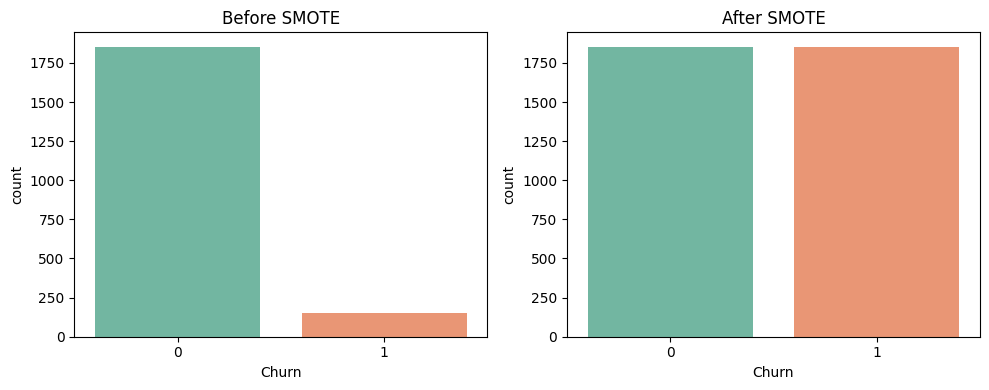

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Prepare features and target

# Features and target
X = df_clean[['account_length', 'voice_mail_plan', 'voice_mail_messages','international_mins', 'customer_service_calls', 'international_plan', 'day_charge', 'evening_charge', 'night_charge', 'international_calls','international_charge', 'total_charge', 'total_mins']]
y = df_clean['churn'] # target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:")
print(y_train.value_counts(normalize=True))

# 3. Apply Normalization
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Use the SAME scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames to keep column names (optional but good practice)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("--- Data after Scaling ---")
print(X_train_scaled.head())

# 4 . Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
print(y_train_res.value_counts(normalize=True))

# 5. Visualization
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x=y_train, ax=axes[0], palette="Set2")
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Churn")

sns.countplot(x=y_train_res, ax=axes[1], palette="Set2")
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Churn")

plt.tight_layout()
plt.show()


In [35]:
# Counts before & after

orig_counts = y_train.value_counts()
res_counts = y_train_res.value_counts()

print("Before SMOTE:")
print(f"Churn = 0: {orig_counts[0]}")
print(f"Churn = 1: {orig_counts[1]}")
print(f"Total samples: {len(y_train)}")

print("\nAfter SMOTE:")
print(f"Churn = 0: {res_counts[0]}")
print(f"Churn = 1: {res_counts[1]}")
print(f"Total samples: {len(y_train_res)}")

# Synthetic samples generated

synthetic_samples = res_counts[1] - orig_counts[1]
print(f"\nSynthetic samples generated for minority class (Churn=1): {synthetic_samples}")

Before SMOTE:
Churn = 0: 1853
Churn = 1: 152
Total samples: 2005

After SMOTE:
Churn = 0: 1853
Churn = 1: 1853
Total samples: 3706

Synthetic samples generated for minority class (Churn=1): 1701


Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train model on SMOTE-resampled training set
log_model.fit(X_train_res, y_train_res)

# Predict on untouched test set
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Results (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Results (with SMOTE):
Accuracy: 0.7788844621513944
Confusion Matrix:
 [[363 101]
 [ 10  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       464
           1       0.22      0.74      0.34        38

    accuracy                           0.78       502
   macro avg       0.60      0.76      0.60       502
weighted avg       0.92      0.78      0.83       502



Logistic Regression Tuned

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

# Use the resampled training data
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train_res, y_train_res)

# Best model
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluation
print("Tuned Logistic Regression Results (with SMOTE):")
print("Best Parameters:", grid_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Tuned Logistic Regression Results (with SMOTE):
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.7768924302788844
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       464
           1       0.22      0.74      0.33        38

    accuracy                           0.78       502
   macro avg       0.59      0.76      0.60       502
weighted avg       0.92      0.78      0.83       502



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model on SMOTE-resampled data
rf_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Results (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results (with SMOTE):
Accuracy: 0.9721115537848606
Confusion Matrix:
 [[462   2]
 [ 12  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       464
           1       0.93      0.68      0.79        38

    accuracy                           0.97       502
   macro avg       0.95      0.84      0.89       502
weighted avg       0.97      0.97      0.97       502



Random Forest Classifier Tuned

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search on SMOTE-resampled data
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train_res, y_train_res)

# Best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation
print("Tuned Random Forest Results (with SMOTE):")
print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Tuned Random Forest Results (with SMOTE):
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.9721115537848606
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       464
           1       0.93      0.68      0.79        38

    accuracy                           0.97       502
   macro avg       0.95      0.84      0.89       502
weighted avg       0.97      0.97      0.97       502



XGBoost Classifier

In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on SMOTE-resampled data
xgb_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Results (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Results (with SMOTE):
Accuracy: 0.9701195219123506
Confusion Matrix:
 [[462   2]
 [ 13  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       464
           1       0.93      0.66      0.77        38

    accuracy                           0.97       502
   macro avg       0.95      0.83      0.88       502
weighted avg       0.97      0.97      0.97       502



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[04:49:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Tuned

In [41]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid search with SMOTE-resampled data
grid_xgb = GridSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_xgb.fit(X_train_res, y_train_res)

# Best model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluation
print("Tuned XGBoost Results (with SMOTE):")
print("Best Parameters:", grid_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[04:54:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Tuned XGBoost Results (with SMOTE):
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.9701195219123506
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       464
           1       0.93      0.66      0.77        38

    accuracy                           0.97       502
   macro avg       0.95      0.83      0.88       502
weighted avg       0.97      0.97      0.97       502



SVM

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train on SMOTE-resampled data
svm_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("SVM Results (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Results (with SMOTE):
Accuracy: 0.9302788844621513
Confusion Matrix:
 [[441  23]
 [ 12  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       464
           1       0.53      0.68      0.60        38

    accuracy                           0.93       502
   macro avg       0.75      0.82      0.78       502
weighted avg       0.94      0.93      0.93       502



K Nearest Neighbour

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate
print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Results:
Accuracy: 0.848605577689243
Confusion Matrix:
 [[397  67]
 [  9  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       464
           1       0.30      0.76      0.43        38

    accuracy                           0.85       502
   macro avg       0.64      0.81      0.67       502
weighted avg       0.93      0.85      0.88       502



KNN Tuned

In [44]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_res, y_train_res)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("Tuned KNN Results:")
print("Best Parameters:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Tuned KNN Results:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.8764940239043825
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       464
           1       0.35      0.71      0.47        38

    accuracy                           0.88       502
   macro avg       0.66      0.80      0.70       502
weighted avg       0.93      0.88      0.90       502



LightGBM

In [45]:
import lightgbm as lgb

# Initialize model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100)

# Train model
lgb_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate
print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1853, number of negative: 1853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 3706, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Results:
Accuracy: 0.9701195219123506
Confusion Matrix:
 [[461   3]
 [ 12  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       464
           1       0.90      0.68      0.78        38

    accuracy                           0.97       502
   macro avg       0.94      0.84      0.88       502
weighted avg       0.97      0.97      0.97       502



LightGBM Tuned

In [46]:
import lightgbm as lgb

param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0]
}

grid_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42),
                        param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train_res, y_train_res)

best_lgb = grid_lgb.best_estimator_
y_pred_lgb = best_lgb.predict(X_test_scaled)

print("Tuned LightGBM Results:")
print("Best Parameters:", grid_lgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 1853, number of negative: 1853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 3706, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

Summarizing all the models accuracy

In [47]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

# List of all models and their predictions
models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "LightGBM": y_pred_lgb,
    # Tuned models
    "Tuned Logistic Regression": y_pred_lr,
    "Tuned Random Forest": y_pred_rf,
    "Tuned XGBoost": y_pred_xgb,
    "Tuned KNN": y_pred_knn,
    "Tuned LightGBM": y_pred_lgb
}

# Dictionary to store accuracy
accuracy_dict = {}

for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = accuracy

# Create a DataFrame for easy visualization
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Model Accuracy Comparison:")
print(accuracy_df)

# Identify the best model
best_model_name = accuracy_df.iloc[0]["Model"]
print(f"\nBest Model: {best_model_name} with Accuracy: {accuracy_df.iloc[0]['Accuracy']:.4f}")

# Map model name to actual trained object
trained_models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "LightGBM": lgb_model,
    "Tuned Logistic Regression": best_lr,
    "Tuned Random Forest": best_rf,
    "Tuned XGBoost": best_xgb,
    "Tuned KNN": best_knn,
    "Tuned LightGBM": best_lgb
}

Model Accuracy Comparison:
                        Model  Accuracy
0               Random Forest  0.972112
1         Tuned Random Forest  0.972112
2                    LightGBM  0.972112
3              Tuned LightGBM  0.972112
4                     XGBoost  0.970120
5               Tuned XGBoost  0.970120
6                         SVM  0.930279
7                   Tuned KNN  0.876494
8                         KNN  0.876494
9         Logistic Regression  0.778884
10  Tuned Logistic Regression  0.776892

Best Model: Random Forest with Accuracy: 0.9721


/tmp/ipython-input-326454307.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




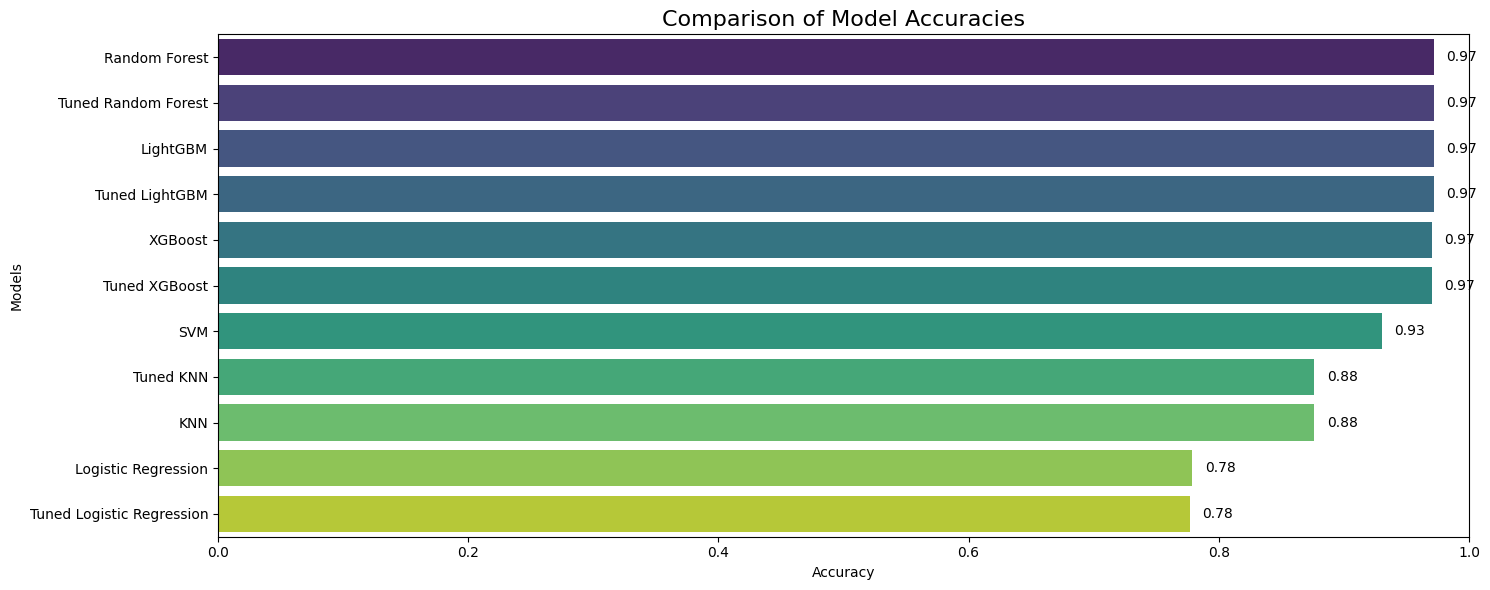

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15,6))

# Create barplot
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette="viridis")

# Add title and labels
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.xlim(0,1)  # Accuracy is between 0 and 1

# Annotate accuracy values on bars
for index, value in enumerate(accuracy_df["Accuracy"]):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()


In [49]:
# # Save the best model
# best_model_object = trained_models[best_model_name]
# joblib.dump(best_model_object, "best_model.pkl")
# print(f"Best model saved as 'best_model.pkl'")
